# Programming Assignment # 4 Clustering

## Student Details

When submitting, fill your full name, your student ID and your NetID in this cell. Note that this is a markdown cell! 

Student Full Name: Savaliya Kuldip Rameshbhai

ID: 1001832000

Team Mate name : Shivani Manojkumar Panchiwala

ID : 1001982478

2) Meghaben Ghanshyambhai Patel

ID: 1002006777

## Rules

1. Work is to be done in a team
2. Any cheating including plagiarism, cooperation will be reported to the corresponding UTA’ s instance.
3. If using any resource (books, internet), please make sure that you cite it.
4. Follow the given structure. Specifically, place all your tasks in THIS NOTEBOOK BUT IN SEPARATE BLOCKS. Then save this notebook as 'yourNetID_pa3.ipynb' and submit it. 
5. Do not alter the dataset name.
6. Please dont ask any details specific to the project like "How to plot XYZ ? What parameters are to be used? " and so on..
7. Report is required for this assignment. Still you need to comment your code. (-10 for no comments in the code.)
8. Please dont send images of your visualizations to verify whether they are right or not before submission deadline.



## Assignment Details

The purpose of this assignment is to cluster  using K-means clustering and Hierarchical Agglomerative clustering models and to visualize clusters for predicted and actual cluster labels.


Your dataset is given as 2 files(clustering.csv and college.csv).<br>
Output variable for clustering.csv - Class (<=50K and >50K)<br>
Output variable for college.csv - Grad.Rate (<=50 and >50k)<br>

You need to submit this ipython file after renaming it. 

Preprocessing will be needed for the data as most of the data is in string and needs to be quantified.



In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Required Python Packages 

# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only
-20 points for the use of libraries other than the above mentioned

In [2]:
# import necessary packages and library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In [3]:
#Read dataset
df= pd.read_csv('clusteringdata.csv')
df.head()

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# checking any null values present or not
df.isnull().sum()

Age                0
WorkClass          0
Fnlwght            0
Education          0
EducationNumber    0
MaritalStatus      0
Occupation         0
Relationship       0
Race               0
Sex                0
CapitalGain        0
CapitalLoss        0
HoursPerWeek       0
NativeCountry      0
Class              0
dtype: int64

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method. 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (k will be from 1 to 10 in this task), and for each value of k calculate the sum of squared errors (SSE). Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is a cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

In [5]:
#########################begin code for Task 1-a
#########################begin code for Task 1-a


In [6]:
# replacing '?' symbol with null value
from numpy import nan
df = df.replace(' ?',nan)
df.head()

,Age,WorkClass,Fnlwght,Education,EducationNumber,MaritalStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
#replace the null values by the mode of the NativeCountry, Occupation and WorkClass columns in respectively.
df1 = df[df.isna().any(axis=1)]

df['NativeCountry'].fillna(df['NativeCountry'].mode()[0],inplace = True)
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace = True)
df['WorkClass'].fillna(df['WorkClass'].mode()[0],inplace = True)

#Taking out the categorical attributes
cat_feats =df.dtypes[df.dtypes=='object'].index.tolist()
cat_idx = [df.columns.get_loc(col) for col in cat_feats]

#Encoding categorical features
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
encoded_cat_feats = encoder.fit_transform(df.loc[:,cat_feats])

encoded_cat_feats_name = encoder.get_feature_names(cat_feats)

C:\Users\pshiv\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
encoded_cat_feats_df = pd.DataFrame(encoded_cat_feats, columns=encoded_cat_feats_name)
encoded_cat_feats_df.head()

,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Private,WorkClass_ Self-emp-inc,WorkClass_ Self-emp-not-inc,WorkClass_ State-gov,WorkClass_ Without-pay,Education_ 10th,Education_ 11th,Education_ 12th,...,NativeCountry_ Scotland,NativeCountry_ South,NativeCountry_ Taiwan,NativeCountry_ Thailand,NativeCountry_ Trinadad&Tobago,NativeCountry_ United-States,NativeCountry_ Vietnam,NativeCountry_ Yugoslavia,Class_ <=50K,Class_ >50K
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
encoded_cat_feats_df = pd.DataFrame(encoded_cat_feats, columns=encoded_cat_feats_name)
num_feats =df.dtypes[df.dtypes!='object'].index.tolist()
df_num= df.loc[:,num_feats].copy()
concatenated_data= pd.concat([df_num, encoded_cat_feats_df], axis= 1)

In [10]:
concatenated_data.head()

,Age,Fnlwght,EducationNumber,CapitalGain,CapitalLoss,HoursPerWeek,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Private,WorkClass_ Self-emp-inc,...,NativeCountry_ Scotland,NativeCountry_ South,NativeCountry_ Taiwan,NativeCountry_ Thailand,NativeCountry_ Trinadad&Tobago,NativeCountry_ United-States,NativeCountry_ Vietnam,NativeCountry_ Yugoslavia,Class_ <=50K,Class_ >50K
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
scaler = MinMaxScaler()
sc= scaler.fit(concatenated_data)
X= sc.transform(concatenated_data)

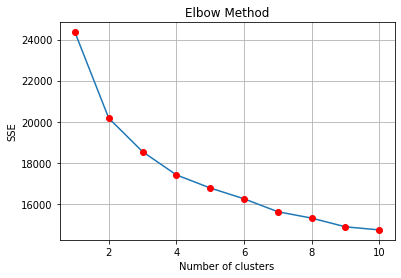

In [12]:
#Elbow method plot
#from k= 1 to 10
from sklearn.cluster import KMeans
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 2022)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.plot(range(1, 11), sse, 'o', color='Red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

From the above graph, In elbow method we can see that the Number of  clusters vary from k=1 to 10 and for every value of K SSE is vary according to K. If the Number of clusters increase the SSE is decrease and we can see that for k=4 graph change rapidly and make an elbow shape.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca= pca.fit_transform(X)

### Task 1-b: Visualization for K-Means Clustering

In this task, you will be performing k-means clustering for k=2 and visualize the predicted training samples and actual training samples on scatter plots. Use 70% of the dataset for training and 30% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

Use two subplots for visualizing the predicted training samples and actual training samples on two scatter plots.

Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA). The idea in PCA is to find a linear combination of the two variables that contains most of the information. This new variable or “principal component” can replace the two original variables. You can easily apply PCA to your data with the help of scikit-learn.



# For K = 2

In [14]:
###################begin code for Task 1-b-1: Split the dataset 70% for training and 30% for testing
# random state = 2022
### Important!!!

###################end code for Task 1-b-1

In [15]:
#Actual labels
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X_pca)
data = concatenated_data.copy()
data['clusters']= y_kmeans

In [16]:
# split the dataset into 70% of the dataset for training and 30% of the dataset for testing.
y= data['clusters'].copy()
X= data.drop('clusters', axis=1)
from sklearn.model_selection import train_test_split
train_data, test_data, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

###################end code for Task 1-b-1

#Train

In [17]:
###################begin code for Task 1-b-2: Visualize the predicted training labels vs actual training labels
scaler = MinMaxScaler()
sc = scaler.fit(train_data)
trainData= sc.transform(train_data)
pca = PCA(n_components=2)
train_pca = pca.fit_transform(trainData)
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
train_kmeans = kmeans.fit_predict(train_pca)

[Text(0.5, 0, 'PCA1'), Text(0, 0.5, 'PCA2')]

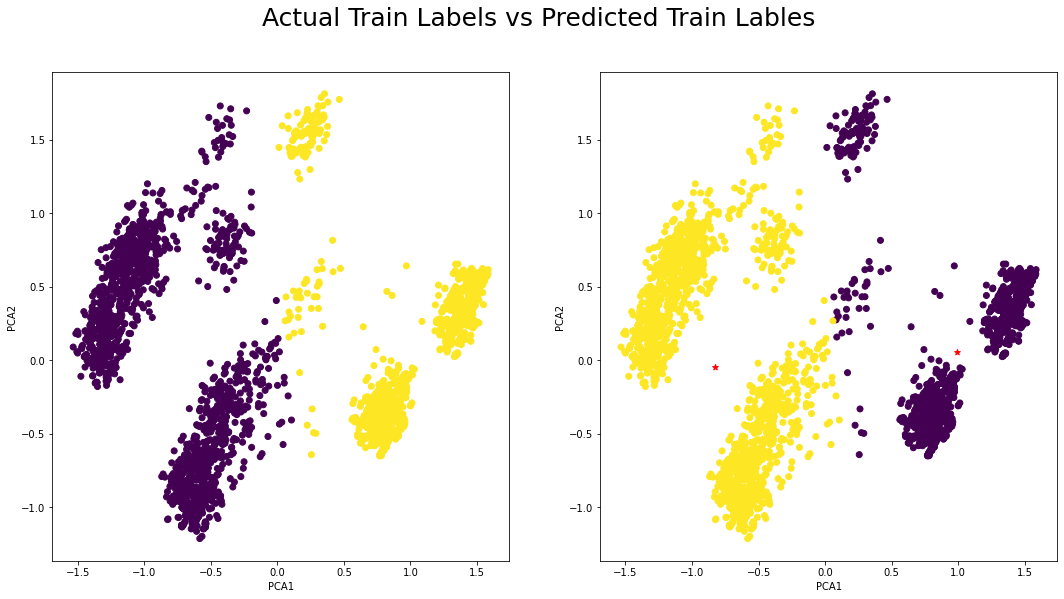

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,9))
fig.suptitle('Actual Train Labels vs Predicted Train Lables', fontsize= 25)

ax1.scatter(x= train_pca[:,0], y= train_pca[:,1], c=y_train)
ax2.scatter(x= train_pca[:,0], y =train_pca[:,1], c=train_kmeans)
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',marker='*', label = 'Centroids')

ax1.set(xlabel='PCA1', ylabel='PCA2')
ax2.set(xlabel='PCA1', ylabel='PCA2')
###################end code for Task 1-b-2

From the Actual Train Labels vs Predicted Train Lables graph, we can see that red marks are the centroids of the clusters. Model divides the data into two clusters for k=2 which are in the subplot.

Now, you need to visualize the predicted testing labels versus actual testing labels. Use the trained model in previous step.

#Test

In [19]:
###################begin code for Task 1-b-3: Visualize the predicted testing labels vs actual testing labels
sc= scaler.fit(test_data)
testData= sc.transform(test_data)

pca = PCA(n_components=2)
test_pca= pca.fit_transform(testData)

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 2022)
test_kmeans = kmeans.fit_predict(test_pca)

[Text(0.5, 0, 'PCA1'), Text(0, 0.5, 'PCA2')]

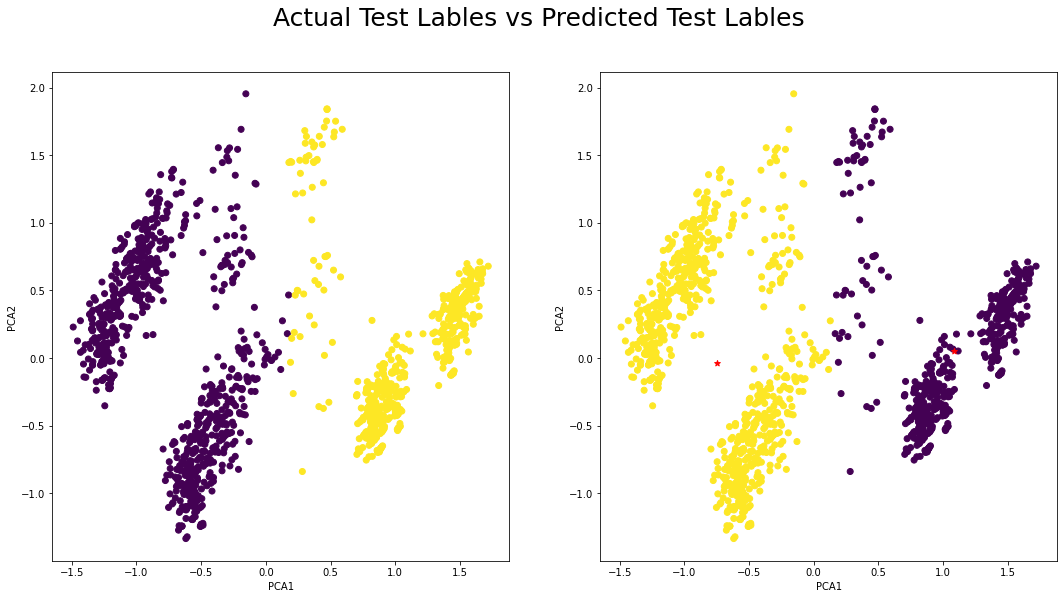

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,9))
fig.suptitle('Actual Test Lables vs Predicted Test Lables', fontsize= 25)

ax1.scatter(x= test_pca[:,0], y= test_pca[:,1], c= y_test)
ax2.scatter(x= test_pca[:,0], y= test_pca[:,1], c= test_kmeans)
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',marker='*' ,label = 'Centroids')

ax1.set(xlabel='PCA1', ylabel='PCA2')
ax2.set(xlabel='PCA1', ylabel='PCA2')
###################end code for Task 1-b-3

In this step, you need to provide the evaluation of your clustering model. Print out a confusion matrix.

#Confusion matrix

In [21]:
###################begin code for Task 1-b-4: Print out a confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test, test_kmeans))

[[  2 886]
 [612   0]]


# TASK 2: Hierarchical Agglomerative  Clustering

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

In this task, you will be performing Hierarchical Agglomerative clustering with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) in order to find the best pair of linkage method and similarity measure. Use F1 score for evaluation and take n_clusters = 2.


In [22]:
###################begin code for Task 2-a: Print out a confusion matrix

# Import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
# Import pairwise_distances for calculate distance
from sklearn.metrics.pairwise import pairwise_distances
# Import f1_score
from sklearn.metrics import f1_score

## Calculate distance
cosine_distance = pairwise_distances(train_pca,metric='cosine')
euclidean_distance = pairwise_distances(train_pca,metric='euclidean')
manhattan_distance = pairwise_distances(train_pca,metric='manhattan')

## Model and fit the selected training data to the AgglomerativeClustering model
## complete linkage + cosine
cos_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(cosine_distance)
f1_cos_complete = f1_score(y_train,cos_comp, average='weighted')


## Model and fit the selected training data to the AgglomerativeClustering model
## complete linkage + euclidean
euc_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)
f1_euc_complete = f1_score(y_train,euc_comp, average='weighted')


## Model and fit the selected training data to the AgglomerativeClustering model
## complete linkage + manhattan
man_comp = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(manhattan_distance)
f1_man_complete = f1_score(y_train,man_comp, average='weighted')


## Model and fit the selected training data to the AgglomerativeClustering model
## average linkage + cosine
cos_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(cosine_distance)
f1_cos_average = f1_score(y_train,cos_avg, average='weighted')


## Model and fit the selected training data to the AgglomerativeClustering model
## average linkage + euclidean
euc_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(euclidean_distance)
f1_euc_average = f1_score(y_train,euc_avg, average='weighted')


## Model and fit the selected training data to the AgglomerativeClustering model
## average linkage + manhattan
man_avg = AgglomerativeClustering(n_clusters=2,linkage='average',affinity='precomputed').fit_predict(manhattan_distance)
f1_man_average = f1_score(y_train,man_avg, average='weighted')


print("F1-score for complete linkage + cosine", f1_cos_complete)
print("F1-score for complete linkage + euclidean", f1_euc_complete)
print("F1-score for complete linkage + manhattan", f1_man_complete)
print("F1-score for average linkage + cosine", f1_cos_average)
print("F1-score for average linkage + euclidean", f1_euc_average)
print("F1-score for average linkage + manhattan", f1_man_average)

###################end code for Task 2-a

###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels




F1-score for complete linkage + cosine 0.11836605778327633
F1-score for complete linkage + euclidean 0.026161102700980005
F1-score for complete linkage + manhattan 0.05025346817678867
F1-score for average linkage + cosine 0.9615365805647047
F1-score for average linkage + euclidean 0.9606545376038729
F1-score for average linkage + manhattan 0.9606545376038729


## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

Find the best performed model from the previous step and use that model for visualizing the predicted training samples and actual training samples on scatter plots. Use PCA model for visualizing your data (use X_train_pca from Task 1-b-2). 

In [23]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels
models = {'cos_comp':f1_cos_complete,'euc_comp':f1_euc_complete,'man_comp':f1_man_complete,'cos_avg':f1_cos_average,'euc_avg':f1_euc_average,'man_avg':f1_man_average}
best_model_value = max(models,key=models.get)

if best_model_value == 'cos_comp':
    best_model = cos_comp

elif best_model_value == 'euc_comp':
    best_model = euc_comp

elif best_model_value == 'man_comp':
    best_model = man_comp

elif best_model_value == 'cos_avg':
    best_model = cos_avg

elif best_model_value == 'euc_avg':
    best_model = euc_avg

elif best_model_value == 'man_avg':
    best_model = man_avg

else:
    best_model = None



In [24]:
best_model

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

[Text(0.5, 0, 'PCA1'), Text(0, 0.5, 'PCA2')]

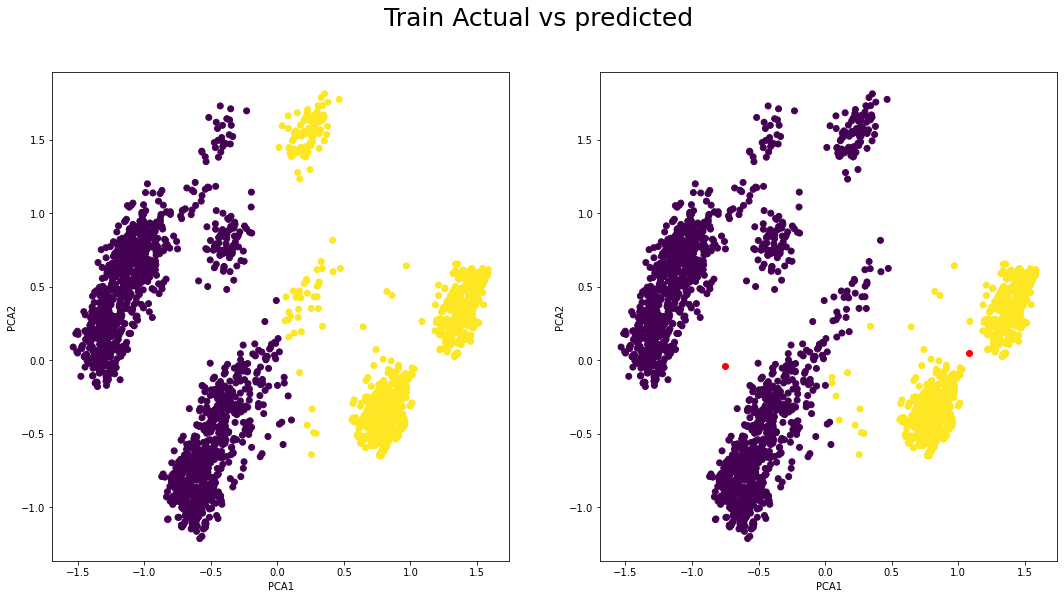

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,9))
fig.suptitle('Train Actual vs predicted', fontsize= 25)

ax1.scatter(x= train_pca[:,0], y= train_pca[:,1], c=y_train)

ax2.scatter(x= train_pca[:,0], y =train_pca[:,1], c=best_model)

ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', label = 'Centroids')

ax1.set(xlabel='PCA1', ylabel='PCA2')
ax2.set(xlabel='PCA1', ylabel='PCA2')

From the above graph displays the Train Actual Vs Predicted labels for train data. The model divides the data into two clusters for k=2 which are display  in the subplot.

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

## Task 3-a: Visualize Clusters 

In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. 

[Text(0.5, 0, 'PCA1'), Text(0, 0.5, 'PCA2')]

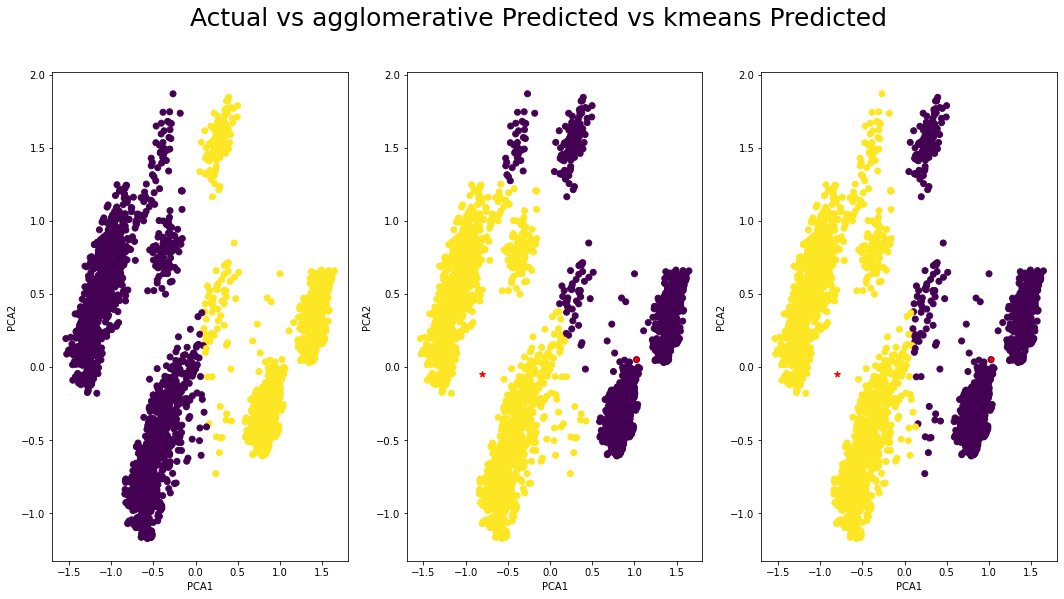

In [26]:
###################begin code for Task 3-a: Visualize the predicted training labels vs actual training labels

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)


kmeans = KMeans(n_clusters = 2, init = 'k-means++')
predicted = kmeans.fit_predict(X_pca)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X

euclidean_distance = pairwise_distances(X_pca,metric='euclidean')

# Model and fit the given data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)

agg = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='precomputed').fit_predict(euclidean_distance)

### Visualizing Clusters
#  Model and fit the given data to the PCA model
x = X_pca[:,0]
y = X_pca[:,1]
# Visualizing the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,9))
fig.suptitle('Actual vs agglomerative Predicted vs kmeans Predicted', fontsize= 25)

ax1.scatter(x, y, c= y_kmeans)

ax2.scatter(x, y , c=agg)
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',marker='*', label = 'Centroids')

ax3.scatter(x, y , c=predicted)
ax3.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red',marker='*', label = 'Centroids')

ax1.set(xlabel='PCA1', ylabel='PCA2')
ax2.set(xlabel='PCA1', ylabel='PCA2')
ax3.set(xlabel='PCA1', ylabel='PCA2')


From the above graph we can see that the subplots of actual vs agglomerative predicted values vs kmeans predicted values. 

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model. Type your reasoning.

In [27]:
###################begin code for Task 3-b
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

cm_k = confusion_matrix(y_kmeans, predicted )
print('Confusion Matrix for KMeans:\n\n', cm_k)
print('*********************')

cm_a = confusion_matrix(y_kmeans, agg )
print('Confusion Matrix for Agglomerative:\n\n', cm_a)
print('*********************')

print(f"Precision KMeans: {2797/(2797+0)}\t Precision Agglomerative: {precision_score(y_kmeans, agg)}")
print(f"Recall KMeans: {2797/(2797+0)} \t Recall Agglomerative: {recall_score(y_kmeans, agg)}")
print(f"F1_score KMeans: {(2*(1*1))/2} \t F1_score Agglomerative: {f1_score(y_kmeans, agg)}")
print('*********************')

print(f"\nHere we can conclude that: \n\n \t - In the Kmeans model it's depicting {cm_k[1][0]} The True Positives and {cm_k[1][0]} The False Positives which make the precison 1 and in the case of Agglomerative model it indentifies {cm_a[1][1]} The True Positives and {cm_a[0][1]} The False Positives which makes the precision 0.992")
print(f"\t - In the Kmeans model it is depicting {cm_k[1][0]} The True Positives and {cm_k[1][1]} The False Negatives which make the Recall 1 and in the \tcase of Agglomerative model it indentifies {cm_a[1][1]} True Positives and {cm_a[1][0]} False Negatives which makes the Recall 0.986")
print(f"\t - F1_score is a function of precision and recall which is the harmonic mean of both. F1_score Kmeans is (2*(1*1))/2= 1 in the case of K Means model whereas in the case of Aggelomerative Clustering F1_score Agglomerative is {f1_score(y_kmeans, agg)}.") 



###################end code for Task 3-b

Confusion Matrix for KMeans:

 [[   0 2797]
 [2203    0]]
*********************
Confusion Matrix for Agglomerative:

 [[  38 2759]
 [2181   22]]
*********************
Precision KMeans: 1.0	 Precision Agglomerative: 0.007910823444804028
Recall KMeans: 1.0 	 Recall Agglomerative: 0.009986382206082615
F1_score KMeans: 1.0 	 F1_score Agglomerative: 0.00882825040128411
*********************

Here we can conclude that: 

 	 - In the Kmeans model it's depicting 2203 The True Positives and 2203 The False Positives which make the precison 1 and in the case of Agglomerative model it indentifies 22 The True Positives and 2759 The False Positives which makes the precision 0.992
	 - In the Kmeans model it is depicting 2203 The True Positives and 0 The False Negatives which make the Recall 1 and in the 	case of Agglomerative model it indentifies 22 True Positives and 2181 False Negatives which makes the Recall 0.986
	 - F1_score is a function of precision and recall which is the harmonic mean of bot

## Grading 

<b>[05 points] Follow the Rules</b> 


<b>[35 points] Task 1:</b>  

    [10 points] Task 1-a: Determine “k” value from the elbow method

    [25 points] Task 1-b: Visualization for K-Means Clustering

        [02 points] Task 1-b-1: Split the dataset 
    
        [10 points] Task 1-b-2: Visualize the predicted training vs actual training labels 
    
        [10 points] Task 1-b-3: Visualize the predicted testing vs actual testing labels
    
        [03 points] Task 1-b-4: Print out a confusion matrix
    


<b>[45 points] Task 2:</b>  

    [35 points] Task 2-a: Find the best Hierarchical Agglomerative Clustering Model

    [10 points] Task 2-b: Visualization for Hierarchical Agglomerative Clustering



<b>[15 points] Report :</b> 
Make a 4 min video explaining both the assignment and it's implementation.


 <b>[20 points] Task 3 (BONUS):</b> 

    Task 3-a: 10 points

    Task 3-b: 10 points